# Visualizing 2D Basketball Keypoints

In [24]:
import json
import os
import glob
import numpy as np
import pandas as pd
import pdb
from tempfile import NamedTemporaryFile
from IPython.display import HTML
from matplotlib import animation
import imageio
import matplotlib.pyplot as plt
import tempfile
import random
import os
%matplotlib inline

In [18]:
VIDEO_TAG = """<video controls>
 <source src="data:video/x-m4v;base64,{0}" type="video/mp4">
 Your browser does not support the video tag.
</video>"""

def anim_to_html(anim):
    if not hasattr(anim, '_encoded_video'):
        with NamedTemporaryFile(suffix='.mp4') as f:
            anim.save(f.name, fps=20, extra_args=['-vcodec', 'libx264'])
            video = open(f.name, "rb").read()
        anim._encoded_video = video.encode("base64")
    
    return VIDEO_TAG.format(anim._encoded_video)

def anim_to_html_windows(anim):
    plt.rcParams["animation.convert_path"] = 'C:/ffmpeg/bin/ffmpeg.exe'
    if not hasattr(anim, '_encoded_video'):
        with NamedTemporaryFile(suffix='.avi') as f:
            anim.save(f.name, writer="ffmpeg")
            video = open(f.name, "rb").read()
        anim._encoded_video = video.encode("base64")
    
    return VIDEO_TAG.format(anim._encoded_video)

def display_animation(anim):
    plt.close(anim._fig)
    return HTML(anim_to_html(anim))

def display_animation_windows(anim):
    plt.close(anim._fig)
    return HTML(anim_to_html_windows(anim))

In [19]:
## setting up some file location info.
label_rootdir = '../project resources/labels/{}/{}/{}/{}.json'
image_rootdir = '../project resources/frames/{}/{}/{}/{}'
game_code = 1571133
shot_type = 'made'
sequence = '00'
frame_id = '000048562'

json_file = label_rootdir.format(game_code,shot_type,sequence,frame_id)

coco_joint_names = [
        'R Ankle', 'R Knee', 'R Hip', 'L Hip', 'L Knee', 'L Ankle', 'R Wrist',
        'R Elbow', 'R Shoulder', 'L Shoulder', 'L Elbow', 'L Wrist', 'Neck',
        'Head', 'Nose', 'L Eye', 'R Eye', 'L Ear', 'R Ear'
    ]
imlist = sorted(glob.glob(image_rootdir.format(game_code,shot_type,sequence,'*.jpg')))
imlist = [im.replace('\\','/') for im in imlist]
jsonlist = sorted(glob.glob(label_rootdir.format(game_code,shot_type,sequence,'*')))
jsonlist = [js.replace('\\','/') for js in jsonlist]

In [64]:
len(jsonlist)

181

#  Clustering

Creating training set...

In [73]:
df_features = []
for joint in coco_joint_names:
    df_features.append(f"{joint}x")
    df_features.append(f"{joint}y")
df = pd.DataFrame(columns=df_features)
for label_file in jsonlist:
    with open(label_file, 'rb') as f:
        label = json.load(f)
    new_line = []
    for joint in coco_joint_names:
        new_line.append(label[joint]['x'])
        new_line.append(label[joint]['y'])
    df = df.append(pd.DataFrame([new_line], columns=df_features))
df = df.reset_index().drop(['index'], axis=1)

Running clustering...

In [74]:
df.columns

Index(['R Anklex', 'R Ankley', 'R Kneex', 'R Kneey', 'R Hipx', 'R Hipy',
       'L Hipx', 'L Hipy', 'L Kneex', 'L Kneey', 'L Anklex', 'L Ankley',
       'R Wristx', 'R Wristy', 'R Elbowx', 'R Elbowy', 'R Shoulderx',
       'R Shouldery', 'L Shoulderx', 'L Shouldery', 'L Elbowx', 'L Elbowy',
       'L Wristx', 'L Wristy', 'Neckx', 'Necky', 'Headx', 'Heady', 'Nosex',
       'Nosey', 'L Eyex', 'L Eyey', 'R Eyex', 'R Eyey', 'L Earx', 'L Eary',
       'R Earx', 'R Eary'],
      dtype='object')

In [77]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

X = df[['R Anklex', 'R Ankley', 'R Kneex', 'R Kneey', 'R Hipx', 'R Hipy',
       'L Hipx', 'L Hipy', 'L Kneex', 'L Kneey', 'L Anklex', 'L Ankley',
       'R Wristx', 'R Wristy', 'R Elbowx', 'R Elbowy', 'R Shoulderx',
       'R Shouldery', 'L Shoulderx', 'L Shouldery', 'L Elbowx', 'L Elbowy',
       'L Wristx', 'L Wristy', 'Neckx', 'Necky', 'Headx', 'Heady']]
x_train, x_test = train_test_split(X, test_size=0.2)

kmeans = KMeans(n_clusters=30, random_state=0)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=30, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [78]:
kmeans.labels_

array([12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 28, 28, 28, 28, 28,
       28, 28, 28,  0,  0,  0,  0,  0,  0,  0,  0, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 13, 13, 13, 13, 13, 13, 13, 13, 13,  9,  9,  9,  9,
        9,  9,  9,  9, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 27,
       27, 27, 27, 27, 27,  3,  3,  3,  3,  3, 24, 24, 24, 24, 24, 24, 24,
       11, 11, 11, 11, 11, 11, 11, 21, 21, 21, 21, 21,  6,  6,  6,  6,  6,
       25, 25, 25, 25, 25, 15, 15, 15, 15, 15,  2,  2,  2,  2,  2,  2, 18,
       18, 18, 18, 18, 18, 18, 14, 14, 14, 14, 14, 14,  7,  7,  7,  7,  7,
       29, 29, 29, 29, 20, 20, 20, 20, 20,  1,  1,  1,  1,  1,  1,  1, 10,
       10, 10, 10, 10, 10, 19, 19, 19, 19, 19, 22, 22, 22, 22,  4,  4,  4,
       23, 23, 23,  8,  8,  8, 26, 26,  5,  5,  5], dtype=int32)

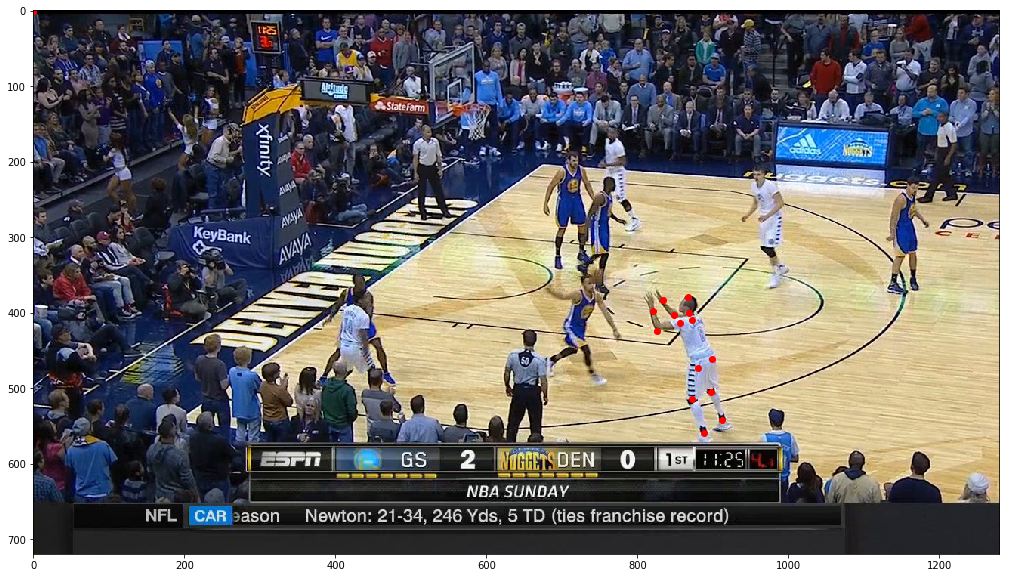

In [20]:
# open one json file
with open(json_file,'rb') as f:
    data_json = json.load(f)
# read corresponding image
fig = plt.figure(figsize=(20,10))
imfile = image_rootdir.format(game_code,shot_type,sequence,data_json['imloc'].split('/')[-1])
im = imageio.imread(imfile)
implot = plt.imshow(im)
for k in coco_joint_names:
    plt.plot(data_json[k]['x'],data_json[k]['y'],'ro')

In [61]:
def viewPose(imlist,jsonlist,number_frames): #,occl):
    from matplotlib import pyplot as plt
    from scipy import misc
    from matplotlib import animation

    fig = plt.figure(figsize=(20,10))
    data = imageio.imread(imlist[0])
    with open(jsonlist[0],'rb') as f:
        data_json = json.load(f)
    #pdb.set_trace()
    #data1 = np.zeros((nx, ny))
    im = plt.imshow(data) #, cmap='gist_gray_r', vmin=0, vmax=1)
    ax = plt.gca()
    line_rightup, = ax.plot([],[],'ro-',lw=2)
    line_head, = ax.plot([],[],'go-',lw=2)
    line_rightlo, = ax.plot([],[],'yo-',lw=2)
    line_leftup, = ax.plot([],[],'mo-',lw=2)
    line_leftlo, = ax.plot([],[],'co-',lw=2)
    
    def init():
        data = imageio.imread('{}{}'.format(imdir,imlist[0]))
        im.set_data(data)
        line_head.set_data([data_json['Head']['x'],data_json['Neck']['x']],[data_json['Head']['y'],data_json['Neck']['y']])
        line_rightup.set_data([data_json['Neck']['x'],data_json['R Shoulder']['x'],data_json['R Elbow']['x'],data_json['R Wrist']['x']],\
                             [data_json['Neck']['y'],data_json['R Shoulder']['y'],data_json['R Elbow']['y'],data_json['R Wrist']['y']])
        line_rightlo.set_data([data_json['R Shoulder']['x'],data_json['R Hip']['x'],data_json['R Knee']['x'],data_json['R Ankle']['x']],\
                             [data_json['R Shoulder']['y'],data_json['R Hip']['y'],data_json['R Knee']['y'],data_json['R Ankle']['y']])
        line_leftup.set_data([data_json['Neck']['x'],data_json['L Shoulder']['x'],data_json['L Elbow']['x'],data_json['L Wrist']['x']],\
                             [data_json['Neck']['y'],data_json['L Shoulder']['y'],data_json['L Elbow']['y'],data_json['L Wrist']['y']])
        line_leftlo.set_data([data_json['L Shoulder']['x'],data_json['L Hip']['x'],data_json['L Knee']['x'],data_json['L Ankle']['x']],\
                             [data_json['L Shoulder']['y'],data_json['L Hip']['y'],data_json['L Knee']['y'],data_json['L Ankle']['y']])
        return im,line_head,line_rightup,line_rightlo,line_leftup,line_leftlo,

    def animate(i):
        imname = imlist[i]
        img = imageio.imread(imname)
        im.set_data(img)
        with open(jsonlist[i],'rb') as f:
            data_json = json.load(f)
        line_head.set_data([data_json['Head']['x'],data_json['Neck']['x']],[data_json['Head']['y'],data_json['Neck']['y']])
        line_rightup.set_data([data_json['Neck']['x'],data_json['R Shoulder']['x'],data_json['R Elbow']['x'],data_json['R Wrist']['x']],\
                             [data_json['Neck']['y'],data_json['R Shoulder']['y'],data_json['R Elbow']['y'],data_json['R Wrist']['y']])
        line_rightlo.set_data([data_json['R Shoulder']['x'],data_json['R Hip']['x'],data_json['R Knee']['x'],data_json['R Ankle']['x']],\
                             [data_json['R Shoulder']['y'],data_json['R Hip']['y'],data_json['R Knee']['y'],data_json['R Ankle']['y']])
        line_leftup.set_data([data_json['Neck']['x'],data_json['L Shoulder']['x'],data_json['L Elbow']['x'],data_json['L Wrist']['x']],\
                             [data_json['Neck']['y'],data_json['L Shoulder']['y'],data_json['L Elbow']['y'],data_json['L Wrist']['y']])
        line_leftlo.set_data([data_json['L Shoulder']['x'],data_json['L Hip']['x'],data_json['L Knee']['x'],data_json['L Ankle']['x']],\
                             [data_json['L Shoulder']['y'],data_json['L Hip']['y'],data_json['L Knee']['y'],data_json['L Ankle']['y']])
        new_line=[]
        return im,line_head,line_rightup,line_rightlo,line_leftup,line_leftlo

    anim = animation.FuncAnimation(fig, animate, frames=number_frames,
                               interval=181)
    print('returning anim')
    return anim



returning anim
done?


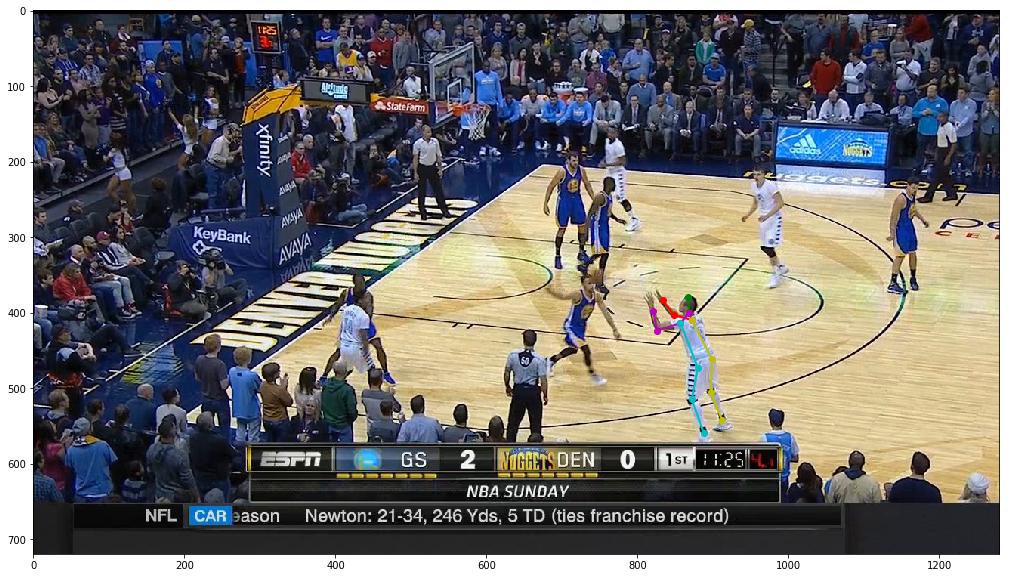

In [62]:
anim = viewPose(imlist,jsonlist,100)
#plt.rcParams["animation.convert_path"] = "C:/Program Files/ImageMagick-7.0.8-Q16/magick.exe"
plt.rcParams["animation.convert_path"] = 'C:/ffmpeg/bin/ffmpeg.exe'
anim.save("test_seq3.avi",writer="ffmpeg",fps=25)
print('done?')
#display_animation(anim)

In [10]:
display_animation(anim)

NameError: name 'HTMLWriter' is not defined

In [ ]:
#plt.rcParams["animation.convert_path"] = 'C:/ffmpeg/bin/ffmpeg.exe'
plt.rcParams["animation.convert_path"] = "C:/Program Files/ImageMagick-7.0.8-Q16/magick.exe"

In [ ]:
data_json